### Imports

In [23]:
# Importing the libraries

import tensorflow as tf
import numpy as np
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import pandas as pd

from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, GRU, Bidirectional
from keras.optimizers import SGD
import math
from sklearn.metrics import mean_squared_error

### Data collection

#### Assume our data is stored as a CSV and we have time stamps

In [30]:
file = 'sensor_data.csv'
df = pd.read_csv(file)
features = df.columns

### Cleaning Data

#### For now I am going to assume the data is in perfect shape. Once we actually get real data I am going to modify this

### Exploratory Data Analysis

In [31]:
df.head()

,Timestamp,GasSensor,Temperature,Pressure,Humidity,BatteryCharge,NetCurrent,Tension,BatteryTemp,PM1.0,...,PM1.0_1/cm3,PM2.5_1/cm3,PM4.0_1/cm3,PM10.0_1/cm3,PMTypSize,CO2,StationID,MsgCounter,IRCameraPixels,PacktCheckSum
0,2022-01-01 00:00:00,"[0.4370861069626263, 0.9556428757689246, 0.758...",21.871135,104515.177509,65.520433,83.117207,-1.128363,3.817853,22.122549,44.667148,...,157.527326,734.787318,2467.477130,629.656802,7.553400,418.796358,1,92,"[23.789715806445635, 20.873598751924458, 21.11...",125
1,2022-01-01 00:05:00,"[0.8491983767203796, 0.29110519961044856, 0.26...",26.149622,103484.731233,25.854750,83.784752,0.803510,3.868300,20.332644,30.571540,...,533.221002,325.010312,617.796451,1235.367342,4.967621,483.921372,9,50,"[23.398291809215205, 26.786392058701487, 30.11...",68
2,2022-01-01 00:10:00,"[0.5104629857953323, 0.8066583652537123, 0.279...",28.888988,96721.567755,22.414686,96.160295,0.797381,4.095355,23.723969,5.785665,...,164.775887,502.931941,2597.122817,2812.025931,5.935501,371.383474,9,6,"[31.749150099563053, 25.49465115638555, 28.318...",199
3,2022-01-01 00:15:00,"[0.3741523922560336, 0.1879049026057455, 0.715...",21.338502,93395.538795,65.194185,85.216622,-0.507754,4.152125,32.558367,25.546529,...,429.491679,429.467005,1493.276817,2603.220970,8.989482,439.027595,4,30,"[27.326070406724867, 18.848083939438883, 15.32...",72
4,2022-01-01 00:20:00,"[0.5920392514089517, 0.26636900997297436, 0.97...",28.906791,101615.221839,45.521316,95.984542,-0.113942,4.150757,36.040230,24.862716,...,408.712523,1463.320039,1098.460388,364.158677,1.980996,429.733094,8,74,"[21.48011003744896, 17.13487786261768, 27.1778...",197


In [32]:
df.tail()

,Timestamp,GasSensor,Temperature,Pressure,Humidity,BatteryCharge,NetCurrent,Tension,BatteryTemp,PM1.0,...,PM1.0_1/cm3,PM2.5_1/cm3,PM4.0_1/cm3,PM10.0_1/cm3,PMTypSize,CO2,StationID,MsgCounter,IRCameraPixels,PacktCheckSum
995,2022-01-04 10:55:00,"[0.18175436295527275, 0.2160435748778355, 0.31...",19.745294,93509.099404,21.040756,94.688946,0.105318,4.193487,21.126580,37.729860,...,199.630649,1895.575030,121.166973,3675.658388,5.014374,401.455953,4,98,"[24.735949641967853, 29.521424702390487, 30.78...",141
996,2022-01-04 11:00:00,"[0.144362799121424, 0.7249203000957439, 0.8490...",23.298298,106124.193103,79.639864,90.020411,-0.400610,4.117324,35.713555,34.444655,...,268.706620,32.735528,1690.548058,2401.863253,3.739350,310.321671,9,10,"[20.843108341148735, 22.762325731898045, 20.95...",38
997,2022-01-04 11:05:00,"[0.5933080584836365, 0.5077132753421696, 0.889...",23.871387,107768.634103,52.612414,92.087229,0.228102,4.024710,32.197990,6.660930,...,439.963150,1648.198579,365.015679,2926.451277,2.237640,364.243260,7,88,"[29.832532500667856, 24.601166476605634, 23.03...",1
998,2022-01-04 11:10:00,"[0.5027880119196468, 0.9253195406925008, 0.521...",27.278235,107025.776786,48.417845,86.055472,-0.201025,3.876142,21.290897,25.103229,...,446.128009,338.275187,945.626978,226.363390,5.574117,424.120536,1,89,"[21.768408794291343, 24.626206635284685, 21.22...",61
999,2022-01-04 11:15:00,"[0.7972494603484075, 0.9521120550534585, 0.190...",21.033894,98667.338974,77.277042,84.007206,0.372593,3.823442,24.363212,39.040732,...,774.411712,784.440457,1984.880585,2241.021820,8.894923,468.211387,6,48,"[19.899662931964652, 15.264901048202951, 25.82...",52


In [33]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Temperature,1000.0,24.962677,4.802120,5.387999,21.741250,25.058604,28.093162,39.570546
Pressure,1000.0,99882.328134,5819.288828,90026.672790,94868.658747,99666.338090,105094.896478,109966.063115
Humidity,1000.0,49.985628,17.385288,20.079192,34.542572,49.779611,65.729726,79.988309
BatteryCharge,1000.0,90.070350,5.849052,80.006195,85.037346,90.115871,95.195068,99.998497
NetCurrent,1000.0,0.014147,0.511308,-1.541281,-0.336607,0.032131,0.361070,1.714455
Tension,1000.0,3.855940,0.199038,3.500870,3.688469,3.860045,4.021928,4.199260
BatteryTemp,1000.0,25.050224,5.113342,6.823999,21.753414,25.092940,28.418395,40.702115
PM1.0,1000.0,25.427672,14.334648,0.126088,13.550406,25.110206,38.264855,49.867227
PM2.5,1000.0,50.716258,29.722857,0.249545,24.395091,52.743225,76.189691,99.990098
PM4.0,1000.0,79.028238,43.480751,0.007219,42.352885,80.783542,116.357282,149.948446


In [48]:
# Expected that values contains the values you want to compare w.r.t time
# Time is every 5 minute intervals
def plot_time_series(timestamps, values, y_label = '', title='', width=0.5, datapoints=100):
    
    # Extract time stamps
    times = pd.to_datetime(timestamps[:datapoints])
    values = values[:datapoints]
    # Plot the original series
    plt.figure(figsize=(12, 6))
    plt.plot(times, values, color='blue', label=y_label, linewidth=width)

    plt.title(title)
    plt.xlabel('Time[min]')
    plt.ylabel(y_label)
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
    plt.show()

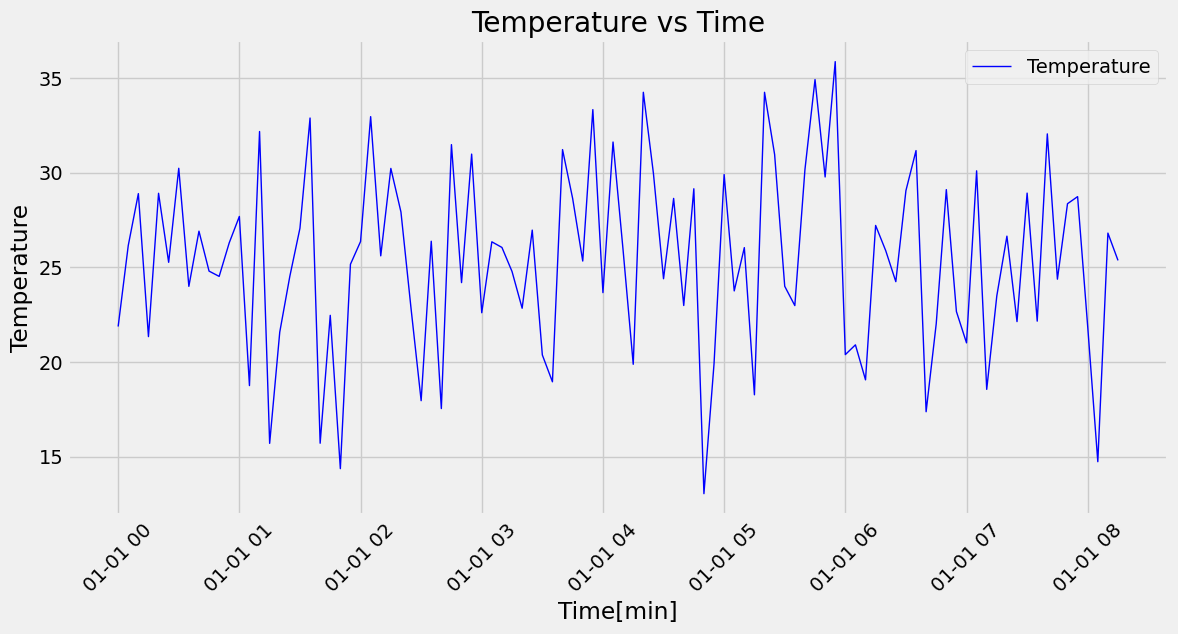

In [50]:
plot_time_series(df.Timestamp, df.Temperature, 'Temperature', 'Temperature vs Time', width=1)